# Dipole Moment Analysis and Visualization Tool

## Description:

This Python script is designed for the purpose of analyzing and visualizing dipole moments, specifically represented by vectors S0 and S1 in three-dimensional space. The script provides a comprehensive evaluation of these moments by calculating various quantities of interest, such as their magnitudes, the angle between them, and then converting these computed values to more universally recognized units.

Why am I doing this? Because the $#%&@! Reviewer #2 told me to.

Here's a more detailed breakdown of the operations the script performs:

1. **Vector Initialization:** The script initializes two vectors, S0 and S1, which represent the two dipole moments.

2. **Computation of Vector Properties:** The dot product and magnitudes (lengths) of the vectors are computed. The angle between these two vectors is then calculated in radians and also converted to degrees for easy interpretation.

3. **Unit Conversion:** A conversion factor from atomic units to Debye is established and used to express the magnitudes of the vectors in Debye units.

4. **Result Display:** The calculated magnitudes of the dipole moments and the angle between them (in both degrees and as a fraction of pi in radians) are printed in a user-friendly manner.

5. **Vector Visualization:** The script plots these vectors in 3D, starting from the origin and extending beyond it. This visual representation aids in understanding the relationship between the two dipole moments in a more intuitive way.

6. **Customizable 3D Plot:** The script sets appropriate plot limits based on the maximum vector magnitude, labels the axes, adds a title, and includes a legend. It then displays the 3D plot.

This script serves as a robust tool for anyone interested in dipole moment analysis, providing both a quantitative and a visual understanding of their relationship. Whether you're a student learning about dipole moments, a teacher demonstrating them, or a researcher analyzing them, this script is a valuable resource.

Magnitude of S0 dipole moment: 7.55 Debye
Magnitude of S1 dipole moment: 8.22 Debye
S0 S1 angle in degrees: 7.33 degrees
S0 S1 angle in radians: 2/49 π radians


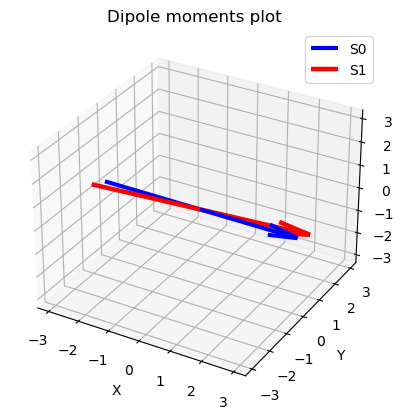

In [9]:
import numpy as np
import fractions
import matplotlib.pyplot as plt

# Define the vectors as numpy arrays
# These vectors represent the dipole moments in atomic units (e * bohr)
S0 = np.array([2.91642, 0.39965, -0.38281])  # Initial dipole moment vector
S1 = np.array([3.08719, 0.83487, -0.47177])  # Final dipole moment vector

# Calculate the dot product of S0 and S1
# The dot product is a scalar value that represents the product of the lengths of the two vectors and the cosine of the angle between them
dot_product = np.dot(S0, S1)

# Calculate the magnitudes (lengths) of the vectors S0 and S1 using the numpy linalg.norm function
# This function returns the root of the sum of the squares of the elements of the input array (the vector's magnitude)
magnitude_S0 = np.linalg.norm(S0)
magnitude_S1 = np.linalg.norm(S1)

# Calculate the cosine of the angle between the vectors S0 and S1
# This is done by dividing the dot product by the product of the magnitudes of the two vectors
cos_theta = dot_product / (magnitude_S0 * magnitude_S1)

# Calculate the angle theta between S0 and S1 in radians using the arccosine function
# The numpy arccos function returns the arc cosine of the input array, in radians
theta_rad = np.arccos(cos_theta)

# Convert the angle from radians to degrees using the numpy degrees function
# This function converts an angle from radians to degrees
theta_deg = np.degrees(theta_rad)

# Conversion factor from atomic units to Debye (e * bohr to Debye)
# This is used to convert the magnitudes of the dipole moments from atomic units to Debye
au_to_Debye = fractions.Fraction(2.541746).limit_denominator()

# Print the magnitudes of the dipole moments S0 and S1 in Debye
print(f"Magnitude of S0 dipole moment: {magnitude_S0*au_to_Debye:.2f} Debye")
print(f"Magnitude of S1 dipole moment: {magnitude_S1*au_to_Debye:.2f} Debye")

# Print the angle between the dipole moments in degrees
print(f"S0 S1 angle in degrees: {theta_deg:.2f} degrees")

# Use the fractions module to get a pretty string representing the angle in radians as a fraction of pi
# This involves converting the angle from radians to a fraction of pi and simplifying the fraction
pretty_rad = fractions.Fraction(theta_rad/np.pi).limit_denominator(100)  # limit_denominator to prevent overly complex fractions
print(f"S0 S1 angle in radians: {pretty_rad} π radians")

# Create a 3D plot showing the dipole moments S0 and S1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vectors starting from the origin with arrowheads
ax.quiver(0, 0, 0, S0[0], S0[1], S0[2], color='b', label='S0', linewidth=magnitude_S0)
ax.quiver(0, 0, 0, S1[0], S1[1], S1[2], color='r', label='S1', linewidth=magnitude_S1)

# Plot the vectors extending beyond the origin without arrowheads
# This is done by plotting the negative of the vectors, which reverses the direction of the vectors
ax.quiver(0, 0, 0, -S0[0], -S0[1], -S0[2], color='b', linewidth=magnitude_S0, arrow_length_ratio=0)
ax.quiver(0, 0, 0, -S1[0], -S1[1], -S1[2], color='r', linewidth=magnitude_S1, arrow_length_ratio=0)

# Set the plot limits based on the maximum magnitude of the dipole moments
max_magnitude = max(magnitude_S0, magnitude_S1)
ax.set_xlim([-max_magnitude, max_magnitude])
ax.set_ylim([-max_magnitude, max_magnitude])
ax.set_zlim([-max_magnitude, max_magnitude])

# Set the labels for the x, y, and z axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the title for the plot
ax.set_title('Dipole moments plot')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()